# Modeling and Simulation of Parallel and Distributed Systems (MSPDS 2016)

__Conclusion__: _It doesn't work because first tasks have decreasing duration that can become negative_.

In [1]:
## Matplotlib configuration
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.linear_model import RidgeCV, LinearRegression
from lib import DataFrameBuilder
from lib import Humanizer, Plotter, Model, OneManyModel, TwoMeanModel
from mynotebook import *

df_builder = DataFrameBuilder()

## Wikipedia Application

### Target

,input size (GiB),workers,samples,outliers,available
0,45,4,30,3,27
1,45,8,30,1,29
2,45,16,30,1,29
3,45,32,30,2,28
4,45,64,30,3,27


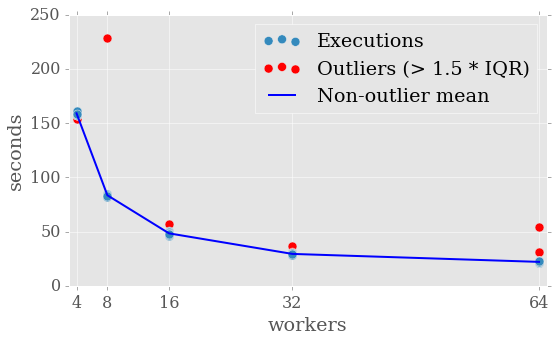

Total target application duration using the complete dataset (45 GB).


In [6]:
target_out = df_builder.get_target_df(stage=0)
humanizer = Humanizer(size=Humanizer.SIZE_GIB)
plotter = Plotter((3, 65), (0, 250))
caption = 'Total target application duration using the complete dataset (45 GB).'
target = process_outliers(target_out, humanizer, plotter, caption)

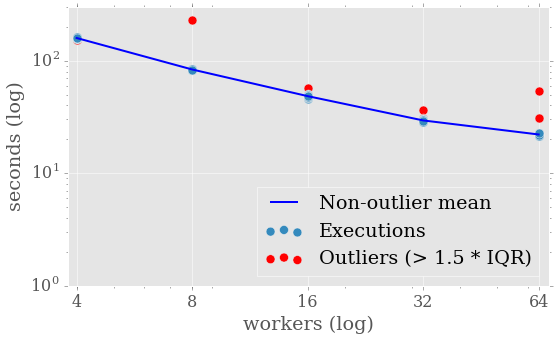

The same as above in log-log scale.


In [8]:
plotter = Plotter((3.8, 68), (1, 300), logx=True, logy=True, loc='lower right')
plotter.plot_outliers(target_out)
print('The same as above in log-log scale.')

### "Reduce" stage

In [28]:
prof_one_first_out, prof_one_nonfirst_out = df_builder.get_1VM_tasks_df(stage=0, threads=2)
prof_one_first_out = prof_one_first_out[prof_one_first_out.input < 1000 * 1024**2]
prof_one_nonfirst_out = prof_one_nonfirst_out

,input size (MiB),workers,samples,outliers,available
0,128,1,20,0,20
1,256,1,20,0,20
2,512,1,20,0,20


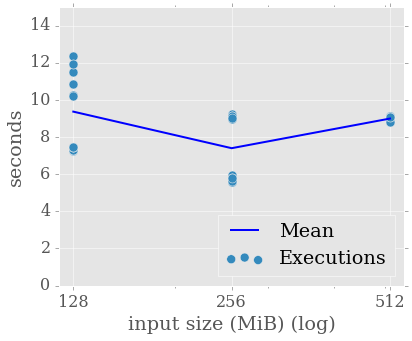

Durations of the first tasks in each thread in one VM.


In [29]:
caption = 'Durations of the first tasks in each thread in one VM.'
humanizer = Humanizer(size=Humanizer.SIZE_MIB)
plotter = Plotter((120, 545), (0, 15), logx=True, figsize=(6, 5), loc='lower right')
prof_one_first = process_outliers(prof_one_first_out, humanizer, plotter, caption)

In [30]:
prof = prof_one_first

display(prof.sample(3))
model = Model(RidgeCV(normalize=True, alphas=(1.25,)), features=['input'], ycol='ms', use_log=False)
display(model.fit_score(prof))
linreg = model.get_linreg()
display(linreg.intercept_, linreg.coef_)

model_one_first = model

,workers,input,ms
59,1,536816741,9073
4,1,134217465,7295
37,1,268425644,5610


[0.17680965194211085,
 ((1, 134217465), 0.20488925740964042),
 ((1, 268425644), 0.28097868829989414),
 ((1, 536816741), 0.04456101011679815)]

8577.8122938619817

array([  2.43364508e-08])

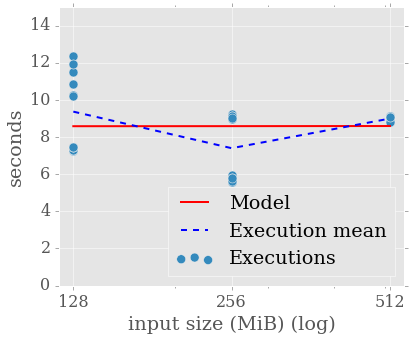

In [31]:
model = model_one_first
prof = prof_one_first

plotter = Plotter((120, 545), (0, 15), logx=True, figsize=(6, 5), loc='lower right')
plotter.plot_model(model, prof)

,input size (MiB),workers,samples,outliers,available
0,512,1,20,0,20
1,1024,1,60,0,60


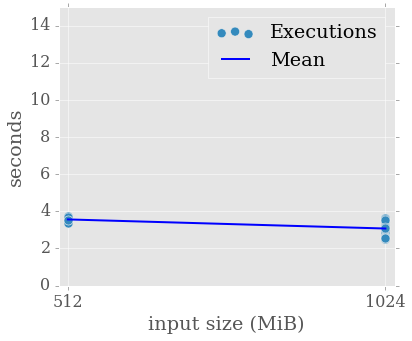

Durations of non-first tasks in each thread in one VM.


In [48]:
caption = 'Durations of non-first tasks in each thread in one VM.'
plotter = Plotter((497, 1039), (0, 15), figsize=(6, 5))
prof_one_nonfirst = process_outliers(prof_one_nonfirst_out, humanizer, plotter, caption)

In [49]:
prof = prof_one_nonfirst

display(prof.sample(3))
model = Model(RidgeCV(normalize=True, alphas=(0.22,)), features=['input'], ycol='ms', use_log=False)
display(model.fit_score(prof))
linreg = model.get_linreg()
display(linreg.intercept_, linreg.coef_)

model_one_nonfirst = model

,workers,input,ms
18,1,536816741,3548
72,1,1073741798,2502
63,1,1073741798,3504


[0.0943645593784493,
 ((1, 536816741), 0.02499947680720422),
 ((1, 1073741798), 0.11748625356886432)]

3896.5790629602252

array([ -7.48239682e-07])

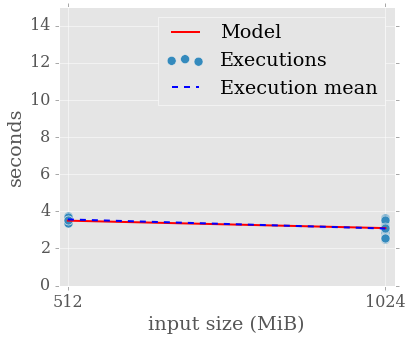

In [50]:
model = model_one_nonfirst
prof = prof_one_nonfirst

plotter = Plotter((497, 1039), (0, 15), figsize=(6, 5))
plotter.plot_model(model, prof)

In [51]:
caption = 'Durations of the first tasks using 1-GB input data.'
prof_many_first_out, prof_many_nonfirst_out = df_builder.get_strong_scaling_tasks_df(2, stage=0, threads=2)

,input size (MiB),workers,samples,outliers,available
0,1024,1,20,6,14
1,1024,2,40,2,38
2,1024,3,60,4,56


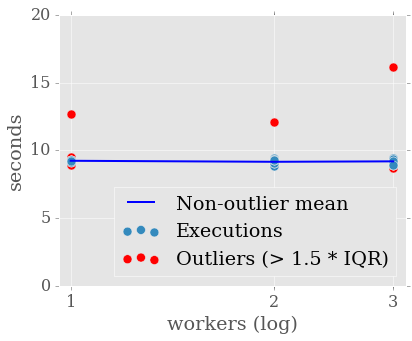

Durations of the first tasks using 1-GB input data.


In [62]:
humanizer = Humanizer(size=Humanizer.SIZE_MIB)
plotter = Plotter((0.96, 3.13), (0, 20), logx=True, logy=False, loc='lower right', figsize=(6, 5))
prof_many_first = process_outliers(prof_many_first_out, humanizer, plotter, caption)

In [63]:
prof = prof_many_first

display(prof.sample(3))
model = Model(RidgeCV(normalize=True, alphas=(3.8,)), features=['workers'], ycol='ms', use_log=False)
display(model.fit_score(prof))
linreg = model.get_linreg()
display(linreg.intercept_, linreg.coef_)

model_many_first = model

,workers,input,ms
54,2,1073741798,9072
20,2,1073741798,9126
37,2,1073741798,8956


[0.01199177300960547,
 ((1, 1073741798), 0.007549363678262672),
 ((2, 1073741798), 0.012087127313688143),
 ((3, 1073741798), 0.01303767063609934)]

9182.1755041791275

array([-1.27501725])

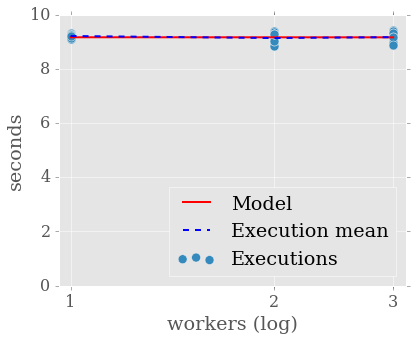

In [68]:
model = model_many_first
prof = prof_many_first

plotter = Plotter((0.96, 3.13), (0, 10), logx=True, logy=False, loc='lower right', figsize=(6, 5))
plotter.plot_model(model, prof)

,input size (MiB),workers,samples,outliers,available
0,1024,1,60,0,60
1,1024,2,40,2,38
2,1024,3,20,0,20


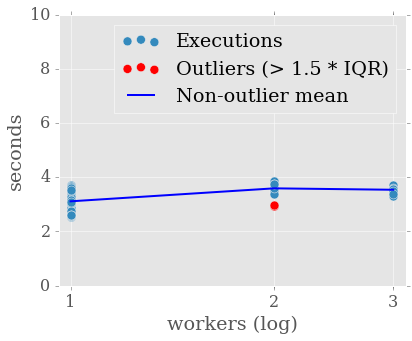

Durations of the non-first tasks using 1-GB input data.


In [71]:
caption = 'Durations of the non-first tasks using 1-GB input data.'
plotter = Plotter((0.96, 3.13), (0, 10), logx=True, logy=False, figsize=(6, 5))
prof_many_nonfirst = process_outliers(prof_many_nonfirst_out, humanizer, plotter, caption)

In [125]:
prof = prof_many_nonfirst

model = Model(RidgeCV(normalize=True, alphas=(2.25,)), features=['workers'], ycol='ms', use_log=True)
model.fit_score(prof)
linreg = model.get_linreg()
display(linreg.intercept_, linreg.coef_)

model_many_nonfirst = model

11.667827377060236

array([ 0.0478635])

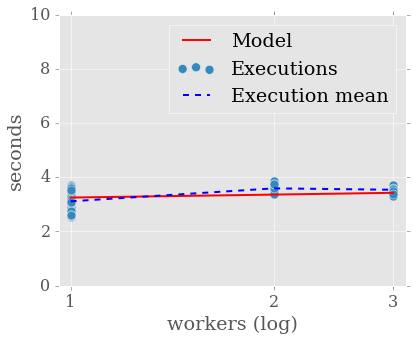

In [73]:
model = model_many_nonfirst
prof = prof_many_nonfirst

plotter = Plotter((0.96, 3.13), (0, 10), logx=True, logy=False, figsize=(6, 5))
plotter.plot_model(model, prof)

In [129]:
model_first = OneManyModel(model_one_first, model_many_first)
model_nonfirst = OneManyModel(model_one_nonfirst, model_many_nonfirst)
model_stage = TwoMeanModel(model_first, model_nonfirst, 2, block_size=128*1024**2)

display(model_nonfirst._many.get_linreg().intercept_)
model_nonfirst._many.get_linreg().coef_

11.667827377060236

array([ 0.0478635])

In [80]:
target_first_out, target_nonfirst_out = df_builder.get_target_tasks_df(stage=0, threads=2)

,input size (GiB),workers,samples,outliers,available
0,45,4,240,6,234
1,45,8,480,56,424
2,45,16,960,107,853
3,45,32,1920,102,1818
4,45,64,3840,163,3677


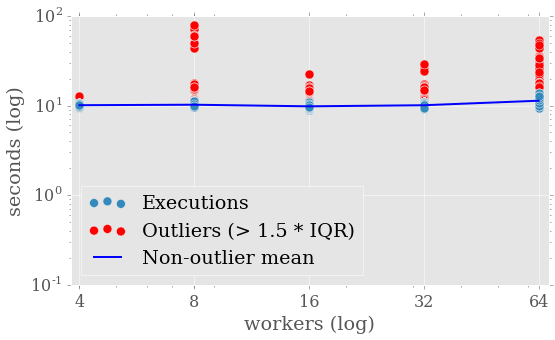

teste


In [86]:
plotter = Plotter((3.8, 68), (0.1, 100), logx=True, logy=True)
humanizer = Humanizer(size=Humanizer.SIZE_GIB)
target_first = process_outliers(target_first_out, humanizer, plotter, 'teste')

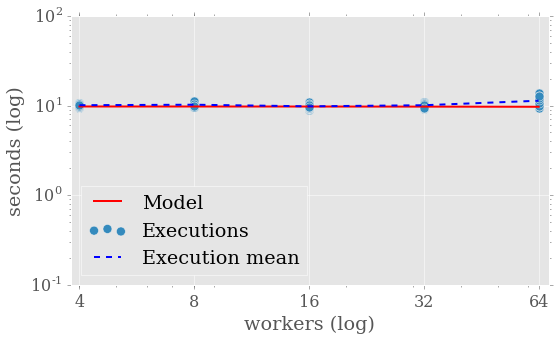

In [87]:
plotter = Plotter((3.8, 68), (0.1, 100), logx=True, logy=True)
plotter.plot_model(model_first, target_first)

,input size (GiB),workers,samples,outliers,available
0,45,4,10620,749,9871
1,45,8,10380,693,9687
2,45,16,9900,442,9458
3,45,32,8940,139,8801
4,45,64,7020,544,6476


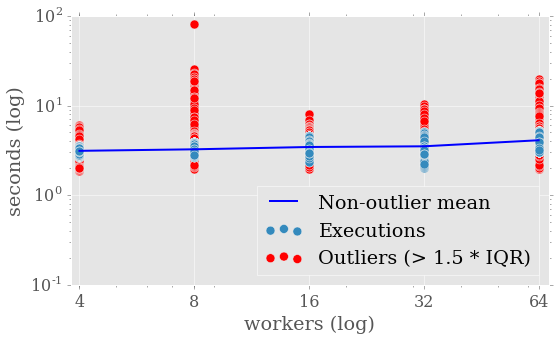

teste


In [93]:
plotter = Plotter((3.8, 68), (0.1, 100), logx=True, logy=True, loc='lower right')
#plotter = Plotter((3.8, 68), (0, 2), logx=True, logy=False, loc='upper center')
humanizer = Humanizer(size=Humanizer.SIZE_GIB)
target_nonfirst = process_outliers(target_nonfirst_out, humanizer, plotter, 'teste')
#plotter = Plotter((3, 65), (1, 20), loc='upper center')
#plotter.plot_model(model_first, target_first)

In [132]:
df = df_builder.from_worker_input([[4, 48542876756]])
#display(model_nonfirst.predict(df))
display('one:')
linreg = model_nonfirst._one.get_linreg()
display(linreg.intercept_, linreg.coef_)
display(model_nonfirst._one.predict(df))
display('many:')
linreg = model_nonfirst._many.get_linreg()
display(linreg.intercept_, linreg.coef_)
display(model_nonfirst._many.predict(df))
#plotter = Plotter((3.8, 68), (0, 10), logx=False, logy=False, loc='upper left')
#plotter.plot_model(model_nonfirst, target_nonfirst)

'one:'

3896.5790629602252

array([ -7.48239682e-07])

array([-32425.12760181])

'many:'

11.667827377060236

array([ 0.0478635])

array([ 3476.82413025])

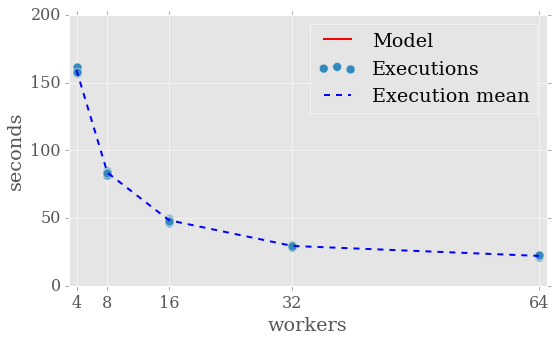

[nan, nan, nan, nan, nan]

In [109]:
plotter = Plotter((3, 65), (0, 200))
plotter.plot_model(model_stage, target)
model_stage.predict(target[['workers', 'input']].drop_duplicates())

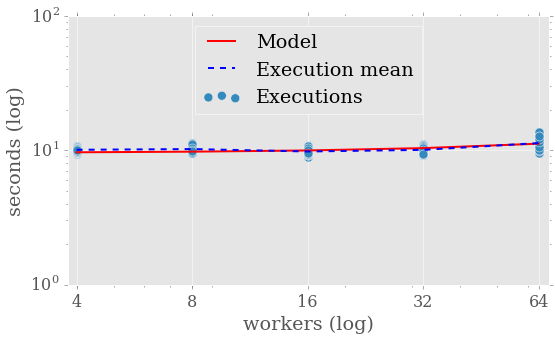

9558.5042863033668

array([ 25.60116852])

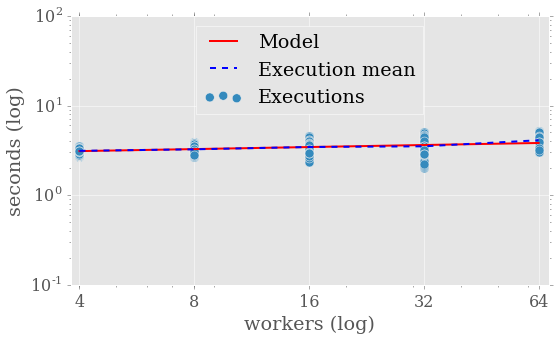

11.443952009728106

array([ 0.07560269])

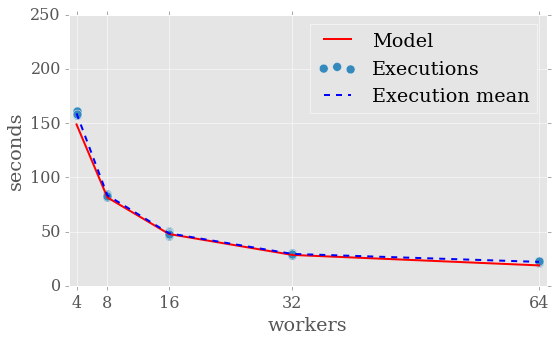

In [111]:
_model_first = Model(RidgeCV(normalize=True), features=['workers'], use_log=False)
_model_nonfirst = Model(RidgeCV(normalize=True), features=['workers'], use_log=True)

_model_first.fit(target_first)
_model_nonfirst.fit(target_nonfirst)

plotter = Plotter((3.8, 68), (1, 100), logx=True, logy=True, loc='upper center')
plotter.plot_model(_model_first, target_first)
linreg = _model_first.get_linreg()
display(linreg.intercept_, linreg.coef_)

plotter = Plotter((3.8, 68), (0.1, 100), logx=True, logy=True, loc='upper center')
plotter.plot_model(_model_nonfirst, target_nonfirst)
linreg = _model_nonfirst.get_linreg()
display(linreg.intercept_, linreg.coef_)

_model_stage = TwoMeanModel(_model_first, _model_nonfirst, 2, block_size=128 * 1024**2)
plotter = Plotter((3, 65), (0, 250))
plotter.plot_model(_model_stage, target)